In [ ]:
# Installation of mysql connector
!pip install mysql-connector-python

In [2]:
# Importing libraries
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Checking version of seaborn library imported
import seaborn as sns
print(sns.__version__)

0.12.2


In [4]:
# Updationg seaborn library to get all functionalities
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in c:\users\othman khadija aliyu\anaconda3\lib\site-packages (0.12.2)


**Creating a Connection with MySQL**

In [5]:
# Creating a connection between MySQL and Python
connection = mysql.connector.connect(host = 'localhost' ,
                                    user = 'root' ,
                                    password = 'Afnern-@260' ,
                                    db = 'techtrendpro')

In [6]:
connection

**Pulling Data from MySQL**

In [7]:
# Getting tables from techtrendpro database
techtrendpro_tables = pd.read_sql_query('SHOW TABLES', connection)

In [8]:
# Print tables in database
techtrendpro_tables

,Tables_in_techtrendpro
0,feedback_data
1,product_data
2,sales_data


In [9]:
# Reading data from feedback table in techtrendpro
Feedback = pd.read_sql_query('SELECT * FROM feedback_data', connection)

In [10]:
# Print top 5 rows of feedback table
Feedback.head()

,Feedback ID,Product ID,Return Date,Return Reason,Customer Feedback
0,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...
1,2,160,2022-12-22,Not as described,The product I received didn't match the descri...
2,3,187,2023-03-10,Defective product,The product I received was defective. It didn'...
3,4,37,2023-02-10,Changed my mind,I received the wrong item. It's not what I ord...
4,5,178,2022-12-15,Not as described,The quality of the product is disappointing. I...


In [11]:
#  Get the description of feedback table
Feedback_describe = pd.read_sql_query('SHOW COLUMNS FROM feedback_data', connection)

In [12]:
#  Print the description of feedback table
Feedback_describe

,Field,Type,Null,Key,Default,Extra
0,Feedback ID,b'int',YES,,None,
1,Product ID,b'int',YES,,None,
2,Return Date,b'date',YES,,None,
3,Return Reason,b'text',YES,,None,
4,Customer Feedback,b'text',YES,,None,


In [13]:
# Reading data from product table in techtrendpro
Product = pd.read_sql_query('SELECT * FROM product_data', connection)

#  Get the description of product table
Product_describe = pd.read_sql_query('SHOW COLUMNS FROM product_data', connection)

In [14]:
# Print top 5 rows of product table
Product.head()

,Product ID,Product Category,Product Attributes
0,1,Accessories,Resolution (pixels)
1,2,Accessories,Compatibility
2,3,Accessories,Material
3,4,Smartphones,Camera Quality (MP)
4,5,Smartphones,Battery Life (hours)


In [15]:
#  Print the description of product table
Product_describe

,Field,Type,Null,Key,Default,Extra
0,Product ID,b'int',YES,,None,
1,Product Category,b'text',YES,,None,
2,Product Attributes,b'text',YES,,None,


In [16]:
# Reading data from sales table in techtrendpro
Sales = pd.read_sql_query('SELECT * FROM sales_data', connection)

#  Get the description of sales table
Sales_describe = pd.read_sql_query('SHOW COLUMNS FROM sales_data', connection)

In [17]:
# Print top 5 rows of sales table
Sales.head()

,Sale ID,Product ID,Sales Date,Sales Volume,Revenue Generated
0,1,25,2023-08-10,6,448.40
1,2,169,2023-04-21,41,355.71
2,3,111,2022-10-02,40,445.44
3,4,91,2022-10-29,66,734.27
4,5,109,2023-03-17,51,307.70


In [18]:
#  Print the description of sales table
Sales_describe

,Field,Type,Null,Key,Default,Extra
0,Sale ID,b'int',YES,,None,
1,Product ID,b'int',YES,,None,
2,Sales Date,b'date',YES,,None,
3,Sales Volume,b'int',YES,,None,
4,Revenue Generated,b'double',YES,,None,


__Descriptive Analysis__

In [19]:
# Get descriptibe analysis of tables in techtrendpro
feedback_data_desc = Feedback.describe(include = 'all')
product_data_desc = Product.describe(include = 'all')
sales_data_desc = Sales.describe(include = 'all')

In [20]:
# Descriptive statistics of feedback_data table
feedback_data_desc

,Feedback ID,Product ID,Return Date,Return Reason,Customer Feedback
count,1500.000000,1500.000000,1500,1500,1500
unique,NaN,NaN,357,5,10
top,NaN,NaN,2022-11-15,Wrong item received,I received the wrong item. It's not what I ord...
freq,NaN,NaN,12,335,175
mean,750.500000,102.080667,NaN,NaN,NaN
std,433.157015,58.738389,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,375.750000,48.000000,NaN,NaN,NaN
50%,750.500000,104.000000,NaN,NaN,NaN
75%,1125.250000,155.000000,NaN,NaN,NaN


In [21]:
# Descriptive statistics of product_data table
product_data_desc

,Product ID,Product Category,Product Attributes
count,200.000000,200,200
unique,NaN,3,17
top,NaN,Accessories,Color Options
freq,NaN,74,36
mean,100.500000,NaN,NaN
std,57.879185,NaN,NaN
min,1.000000,NaN,NaN
25%,50.750000,NaN,NaN
50%,100.500000,NaN,NaN
75%,150.250000,NaN,NaN


In [22]:
# Descriptive statistics of sales_data table
sales_data_desc

,Sale ID,Product ID,Sales Date,Sales Volume,Revenue Generated
count,2000.000000,2000.000000,2000,2000.000000,2000.000000
unique,NaN,NaN,363,NaN,NaN
top,NaN,NaN,2023-02-20,NaN,NaN
freq,NaN,NaN,12,NaN,NaN
mean,1000.500000,102.109500,NaN,51.725000,519.684015
std,577.494589,57.415519,NaN,28.627629,273.633332
min,1.000000,1.000000,NaN,1.000000,50.090000
25%,500.750000,54.000000,NaN,27.000000,283.342500
50%,1000.500000,104.000000,NaN,52.000000,518.560000
75%,1500.250000,153.000000,NaN,76.000000,753.097500


**Exploratory Data Analysis (EDA)**

In [23]:
# merge product_data and sales_data to investigate better
sales_product_data = pd.merge(Sales, Product, on='Product ID')

# merge sales_product_data and feedback_data to get full_data for EDA
full_data = pd.merge(Feedback, sales_product_data, on='Product ID')

In [24]:
# Check datatype of full_data 
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15121 entries, 0 to 15120
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feedback ID         15121 non-null  int64  
 1   Product ID          15121 non-null  int64  
 2   Return Date         15121 non-null  object 
 3   Return Reason       15121 non-null  object 
 4   Customer Feedback   15121 non-null  object 
 5   Sale ID             15121 non-null  int64  
 6   Sales Date          15121 non-null  object 
 7   Sales Volume        15121 non-null  int64  
 8   Revenue Generated   15121 non-null  float64
 9   Product Category    15121 non-null  object 
 10  Product Attributes  15121 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.4+ MB


In [25]:
# change data type of 'Return Date' and 'Sales Date' from object to datetime
full_data['Sales Date'] = pd.to_datetime(full_data['Sales Date'])

full_data['Return Date'] = pd.to_datetime(full_data['Return Date'])

Univariate Analysis

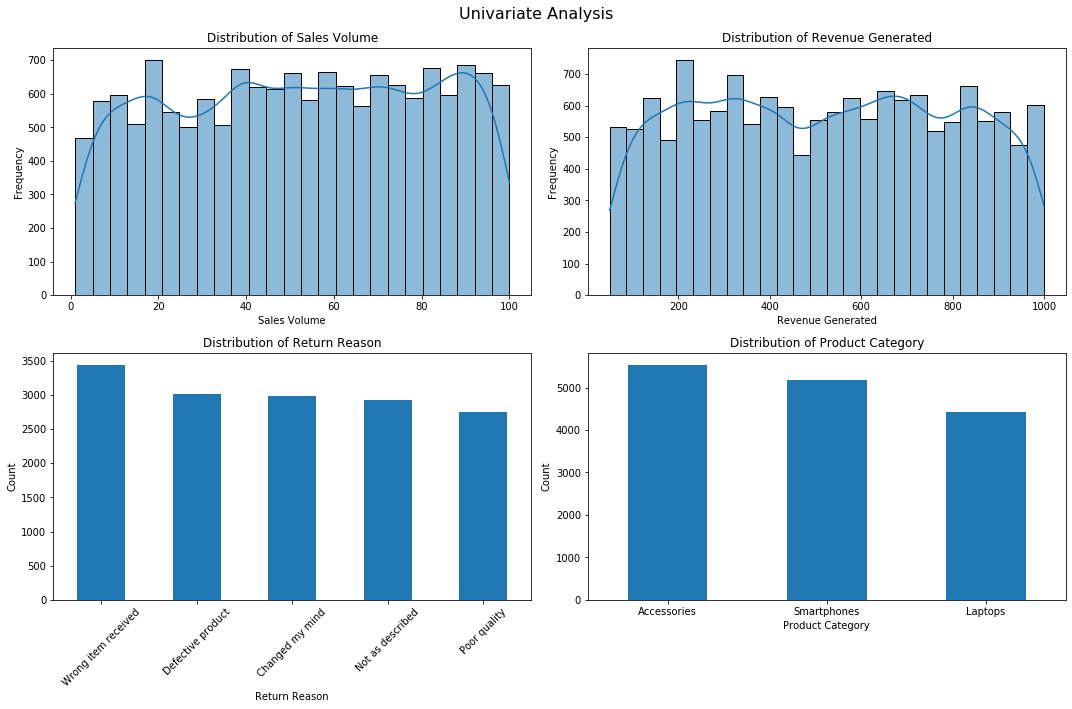

In [31]:
# Univariate analysis  - to observe some trends in the dataset
## subplot grid setting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Univariate analysis for Sales Volume
sns.histplot(full_data['Sales Volume'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sales Volume')
axes[0, 0].set_xlabel('Sales Volume')
axes[0, 0].set_ylabel('Frequency')

#Univariate analysis of Revenue Generated
sns.histplot(full_data['Revenue Generated'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Revenue Generated')
axes[0, 1].set_xlabel('Revenue Generated')
axes[0, 1].set_ylabel('Frequency')

#Univariate analysis of Return Reason
return_reason_counts = full_data['Return Reason'].value_counts()
return_reason_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Return Reason')
axes[1, 0].set_xlabel('Return Reason')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

#Univariate analysis of Product Category
product_cat_counts = full_data['Product Category'].value_counts()
product_cat_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Product Category')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=360)

# Set a title for the entire figure
fig.suptitle('Univariate Analysis', fontsize=16)

# Adjust the layout to make space for the title
plt.tight_layout(rect=(0, 0, 1, 0.96))

# Display the plots
plt.show()

Bivariate Analysis

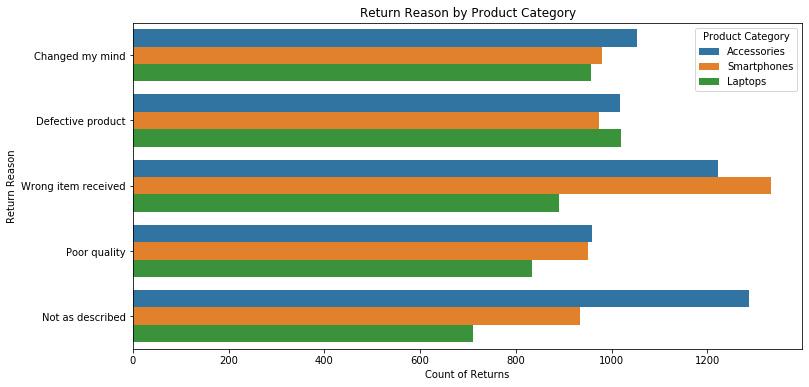

In [32]:
# Bivariate Analysis to see relationship between Return Reason & Product Category
plt.figure(figsize=(12, 6))
sns.countplot(y = 'Return Reason',hue = 'Product Category', data = full_data)
plt.title('Return Reason by Product Category')
plt.xlabel('Count of Returns')
plt.ylabel('Return Reason')
plt.show()

**Investigate relationship betweeen Return Reason and Product Quality**

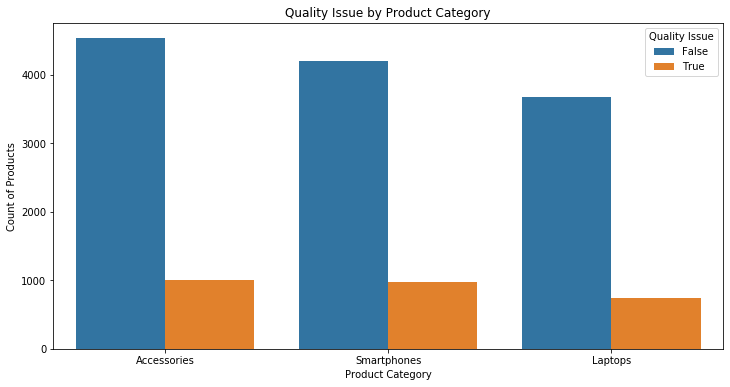

In [36]:
quality_related_terms = ['defective', 'poor quality', 'not as described', 'disappointing', 'poor']

full_data['Quality Issue'] = full_data['Customer Feedback'].apply(
                            lambda x: any(term in x.lower() for term in quality_related_terms))

quality_issue_returns = full_data['Quality Issue'].value_counts()
plt.figure(figsize = (12, 6))
sns.countplot(x= 'Product Category',hue = 'Quality Issue', data = full_data)
plt.title('Quality Issue by Product Category')
plt.ylabel('Count of Products')
plt.xlabel('Product Category')
plt.show()

Chi-Square Test to chech for statistical significant relationship between Product Category & Quality Issues

In [37]:
# Import library for chi2 test 
from scipy.stats import chi2_contingency

In [38]:
# Prepare the contingency table for the chi2 test
contingency_table = pd.crosstab(full_data['Product Category'], full_data['Quality Issue'])

In [50]:
# Prepare the chi2 test and results
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2_test_result = {
    "Chi-Square Statistics": chi2,
    "p-value": p,
    "Expected Frequencies": expected,
    "Degree of Freedom": dof,
}

In [48]:
quality_issue_returns

False    12404
True      2717
Name: Quality Issue, dtype: int64

In [51]:
chi2_test_result

{'Chi-Square Statistics': 6.5587129862987865,
 'p-value': 0.03765247864083011,
 'Expected Frequencies': array([[4543.73097017,  995.26902983],
        [3620.05502282,  792.94497718],
        [4240.21400701,  928.78599299]]),
 'Degree of Freedom': 2}

In [53]:
# converting expected frequencies to a dataframe to visualize the results
expected_df = pd.DataFrame(expected,
                          index=contingency_table.index,
                          columns=contingency_table.columns)

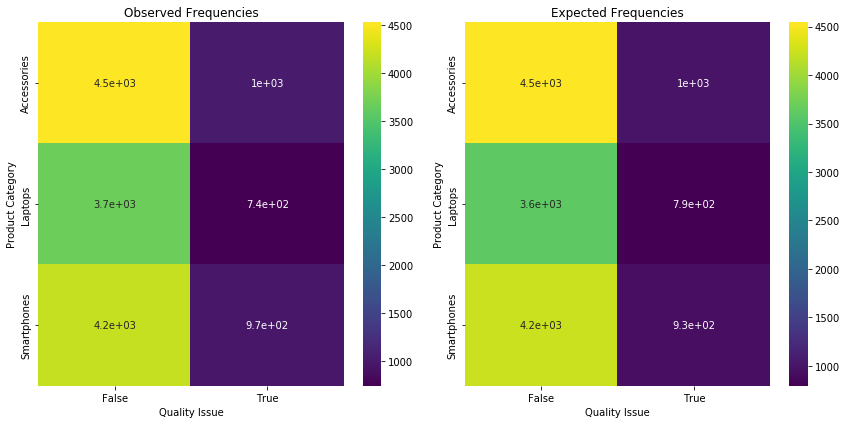

In [54]:
# Visualizing the expected frequencies and observed frequencies on a heatmap

# Establish the subplot
fig, ax = plt.subplots(1, 2, figsize= (12, 6))

# Creating heatmap chart for observed frequencies
sns.heatmap(contingency_table, annot=True, cmap='viridis', ax=ax[0])
ax[0].set_title('Observed Frequencies')

# Creating heatmap chart for expected frequencies
sns.heatmap(expected_df, annot=True, cmap='viridis', ax=ax[1])
ax[1].set_title('Expected Frequencies')

plt.tight_layout()
plt.show()

## Insights

***Quality-Related Returns Across Product Category***
    - A significant potion of returns are linked to quality issues, especially in certain product categories.
    - The chi-square test indicated a statistically significant relationship between product categories and quality issues.

***Specific Categories with Higher Quality Issues***
    - Among the product categories, some show a higher prevalence of quality-related feedback. These categories warrant closer inspection and targeted improvements.

***Customer Feedback as a Quality Indicator***
    - Quality issues like'defective product' or 'poor quality' were frequently mentioned in customer feedback, highlighting the need to address these concerns.

## Recommendations

***Enhance Quality Control for Targeted Categories***
    - TechTrendPro should implement stricter quality control measures, especially for the product categories with a higher incidence of quality-related returns. This could involve more rigourous testing and inspection process before dispatch. 

***Review and Strengthen Supplier Relationship***
    - Analyze and review supplier performance. For suppliers consistently linked with quality issues, consider renegotiation of terms, additional quality checks, or seeking alternative suppliers.  

***Leverage Customer Feedback for Product Improvements***
    - TechTrendPro should utilize insights from customer feedback to inform product development. Identify common complaints and address these in future product designs or updates. 

***Enhance Customer Support and Simplify User Interface/Experience***
    - Some returns may be due to misunderstanding about product use. Providing better information, guides, and proactive customer support could reduce such returns.

***Regular Analysis for Continuous Improvement***
    - Analyzing sales, feedback, and return data regularly to identify emerging trends or new issues, aiding timely corrective actions.

***Invest in Predictive Analytics***
    - Implement predictive analytics to identify potential quality issues before products are shipped. This could help in proactively addressing problems and reducing future returns.

## Conclusion
By focusing on the aforementioned areas, TechTrendPro can potentially reduce return rates, leading to increased customer satisfaction and reduced operational costs associated with handling returns. The key is combining proactive quality management, continuous data monitoring, and leveraging customer feedback for product improvements.